In [1]:
pip install mlxtend

Active code page: 65001
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
#visulaization modules

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Create dataframe and explore the features
diabetes = pd.read_csv('diabetesdata.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,125,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,29,125,30.1,0.349,47,1


In [5]:
#Loading the dataset
#diabetes_data = pd.read_csv('diabetesdata.csv')
'''
basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

'''
#show the summary statistics
diabetes.describe().T  

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


0    500
1    268
Name: Outcome, dtype: int64


'\nIn this test and the dataset,  1/3 of the total test population are suffer from diabetes. \nThe number of people suffering from diabetes has reached half of the health population. \nBesides, the higher number of BMI, could bring the higher the risk of diabetes because the correlation number has 0.31. \n'

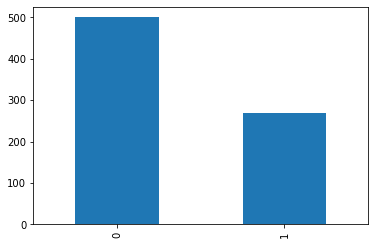

In [6]:
#Task 1
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")
"""
In this test and the dataset,  1/3 of the total test population are suffer from diabetes. 
The number of people suffering from diabetes has reached half of the health population. 
Besides, the higher number of BMI, could bring the higher the risk of diabetes because the correlation number has 0.31. 
"""

'\nIn this plot,  there is a high degree of positive correlation between the diabetes and glucose, it has 0.49. \nIt means high blood glucose in the blood could cause high risk of diabetes.\n'

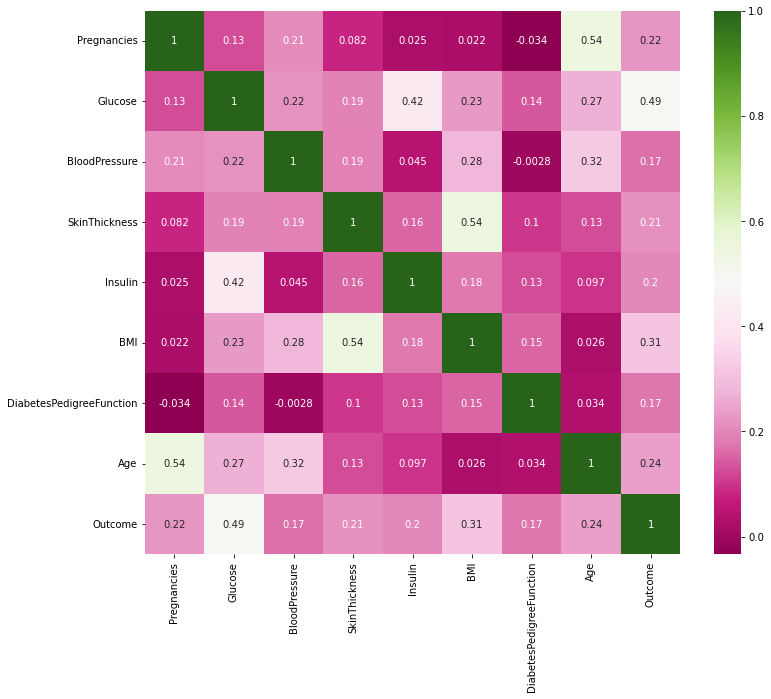

In [7]:
#Task 2
plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='PiYG') 
"""
In this plot,  there is a high degree of positive correlation between the diabetes and glucose, it has 0.49. 
It means high blood glucose in the blood could cause high risk of diabetes.
"""

In [8]:
#Task 3
sc_X = StandardScaler()
# Define the input and target variables
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']) #Input
# #Target/class
y = diabetes.Outcome 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [9]:
#Task 4
#using train_test_split to create train and test sets
 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
print(X_train.shape[0])
print(X_test.shape[0])

537
231


In [10]:
#Task 5
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Find the max score from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {}% and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
#Max train score 100.0 % and k = [1]

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
#Max test score 75.32467532467533 % and k = [11]

Max train score 100.0% and k = [1]
Max test score 75.32467532467533% and k = [11]


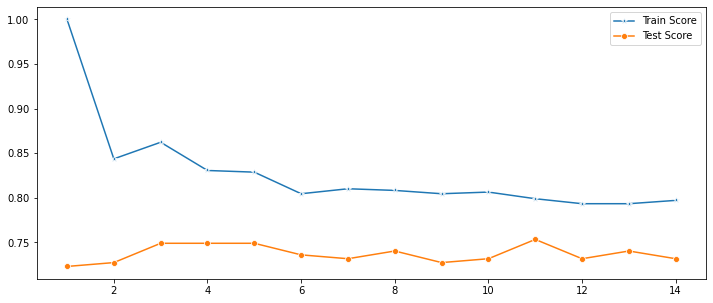

In [11]:
#Task 6
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

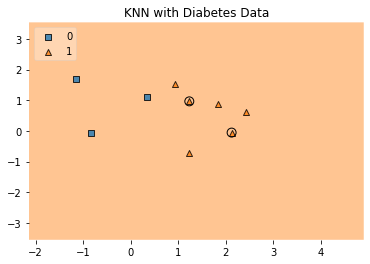

In [12]:
#Task 7: Pass the best k from task 6
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#plot decision boundary 
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()